House Price Prediction Model With Regression using Keras, Scikit-Learn, pandas and matplotlib

# Imports:

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

Reading csv file and uploading it

In [166]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('data.csv')


Saving data.csv to data (3).csv


In [167]:
df.tail()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10 00:00:00,220600.000000,3.0,2.50,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


# Cleaning the dataframe

In [0]:
#dropping text columns
df.drop(['date', 'street', 'city', 'country','yr_built','yr_renovated','statezip'],axis=1, inplace=True)

#Rearranging columns
column_names = [ 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'statezip', 'price']
df = df.reindex(columns=column_names)

dataset = df.values

In [170]:
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,price
0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,313000.0
1,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,2384000.0
2,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,342000.0
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,420000.0
4,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,550000.0




# Preparing the model



In [0]:
# Setting features and labels
X = dataset[:, 0:10]
y = dataset[:, 10]

In [173]:
#Scalling Data
standard_scaler = StandardScaler()

X_scale =standard_scaler.fit_transform(X)
X_scale

array([[-0.44112227, -0.84320364, -0.82997105, ..., -0.6671122 ,
        -0.56522378, -0.67246372],
       [ 1.75970468,  0.43280154,  1.56852826, ...,  2.28641631,
         1.78955903, -0.06912828],
       [-0.44112227, -0.20520105, -0.21736733, ...,  0.80965205,
         0.11917123, -0.67246372],
       ...,
       [-0.44112227,  0.43280154,  0.90400897, ..., -0.6671122 ,
         1.37196208, -0.67246372],
       [ 0.6592912 , -0.20520105, -0.05123751, ..., -0.6671122 ,
        -0.87842149,  1.5254011 ],
       [-0.44112227,  0.43280154, -0.67422434, ...,  0.80965205,
        -0.39122505, -0.67246372]])

In [0]:
#Dividing features into train and validation+testing(80/20)
X_train, X_val_and_test, y_train, y_val_and_test = train_test_split(X_scale, y, test_size=0.2)
#Dividing int0 validation and testing(50/50)
X_val, X_test, y_val, y_test = train_test_split(X_val_and_test, y_val_and_test, test_size=0.5)

# ML!


Functions that calculate metrics for regression models

In [0]:


# root mean squared error (rmse) for regression
def rmse(y_true, y_pred):
    from keras import backend
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

# mean squared error (mse) for regression
def mse(y_true, y_pred):
    from keras import backend
    return backend.mean(backend.square(y_pred - y_true), axis=-1)

# coefficient of determination (R^2) for regression
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot + K.epsilon()))

def r_square_loss(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return 1 - ( 1 - SS_res/(SS_tot + K.epsilon()))



Creating The Model

In [0]:
#Sequential Model
model = Sequential()
#First layer with 20 neurons, and 10 inputs(columns)
model.add(Dense(units=20, activation='relu', input_dim=10,kernel_initializer='normal'))
#Output Layer with 1 neuron
model.add(Dense(units=1,kernel_initializer='normal'))

Compiling the model

In [0]:
model.compile(optimizer="Nadam", 
              loss="mean_squared_error", 
              metrics=["mean_squared_error", 
                       rmse, 
                       r_square])

Training the model 

In [185]:
hist = model.fit(
    X_train, y_train,
    batch_size=5, epochs=100,
    validation_data=(X_val,y_val)
)

Train on 3680 samples, validate on 460 samples
Epoch 1/100
3680/3680 [==============================] - 1s 256us/step - loss: 3679652.0211 - mean_squared_error: 3679652.2500 - rmse: 1917.1273 - r_square: -9286.5498 - val_loss: 3267478.9620 - val_mean_squared_error: 3267478.7500 - val_rmse: 1805.8130 - val_r_square: -7259.2656
Epoch 2/100
3680/3680 [==============================] - 1s 224us/step - loss: 2656578.3753 - mean_squared_error: 2656579.5000 - rmse: 1617.3947 - r_square: -6939.0522 - val_loss: 2015661.8791 - val_mean_squared_error: 2015661.7500 - val_rmse: 1397.5172 - val_r_square: -4474.5942
Epoch 3/100
3680/3680 [==============================] - 1s 225us/step - loss: 1486057.3311 - mean_squared_error: 1486056.3750 - rmse: 1165.6030 - r_square: -3819.8501 - val_loss: 1039305.9219 - val_mean_squared_error: 1039305.8750 - val_rmse: 938.6476 - val_r_square: -2326.0520
Epoch 4/100
3680/3680 [==============================] - 1s 229us/step - loss: 775750.6711 - mean_squared_error

Evaluating the model in each metric

In [186]:
model.evaluate(X_test,y_test)

460/460 [==============================] - 0s 42us/step


[526.8449189559273, 526.8448486328125, 17.608562469482422, 0.3849080801010132]

Predicting 

In [187]:
prediction = model.predict(X_test)
prediction

array([[1950.013 ],
       [1962.5292],
       [1989.5701],
       [1989.258 ],
       [1987.1095],
       [1948.0967],
       [1956.9705],
       [1984.7042],
       [1957.344 ],
       [1962.4834],
       [1974.1777],
       [1956.7556],
       [1970.845 ],
       [1952.9792],
       [1939.2314],
       [1946.0338],
       [1955.1252],
       [1959.4265],
       [1979.8777],
       [1988.9396],
       [1942.8738],
       [1990.6405],
       [1990.8895],
       [1982.669 ],
       [1990.9946],
       [1942.7124],
       [1943.2657],
       [1968.685 ],
       [1967.2683],
       [1978.4531],
       [1955.44  ],
       [1986.058 ],
       [1996.889 ],
       [1952.5944],
       [1942.522 ],
       [1941.6346],
       [1993.2465],
       [1939.3293],
       [2001.1538],
       [1958.3353],
       [1945.5107],
       [1984.4517],
       [1973.9321],
       [1950.7303],
       [1990.4653],
       [1994.8958],
       [1946.644 ],
       [1964.5774],
       [1988.1555],
       [1987.4951],


# Plotting the results

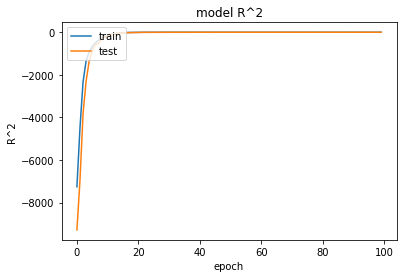

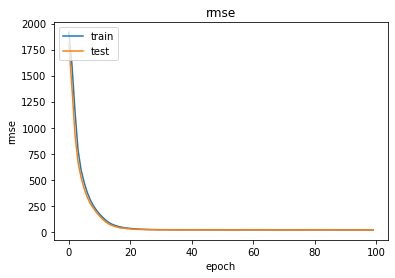

Text(0, 0.5, 'predicted')

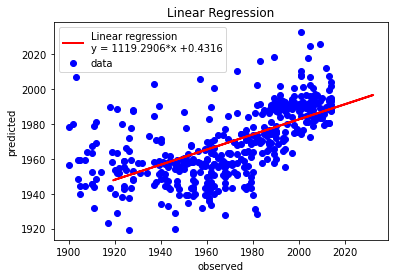

In [190]:
# plot training curve for R^2 (beware of scale, starts very low negative)
plt.plot(hist.history['val_r_square'])
plt.plot(hist.history['r_square'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
           
# plot training curve for rmse
plt.plot(hist.history['rmse'])
plt.plot(hist.history['val_rmse'])
plt.title('rmse')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# print the linear regression and display datapoints
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(y_test.reshape(-1,1), prediction)  
y_fit = regressor.predict(prediction) 

reg_intercept = round(regressor.intercept_[0],4)
reg_coef = round(regressor.coef_.flatten()[0],4)
reg_label = "y = " + str(reg_intercept) + "*x +" + str(reg_coef)

plt.scatter(y_test, prediction, color='blue', label= 'data')
plt.plot(prediction, y_fit, color='red', linewidth=2, label = 'Linear regression\n'+reg_label) 
plt.title('Linear Regression')
plt.legend()
plt.xlabel('observed')
plt.ylabel('predicted')

Quick print of important metrics

In [192]:
import sklearn.metrics, math
print("\n")
print("Mean absolute error (MAE):      %f" % sklearn.metrics.mean_absolute_error(y_test,prediction))
print("Mean squared error (MSE):       %f" % sklearn.metrics.mean_squared_error(y_test,prediction))
print("Root mean squared error (RMSE): %f" % math.sqrt(sklearn.metrics.mean_squared_error(y_test,prediction)))
print("R square (R^2):                 %f" % sklearn.metrics.r2_score(y_test,prediction))



Mean absolute error (MAE):      17.608564
Mean squared error (MSE):       526.844912
Root mean squared error (RMSE): 22.953102
R square (R^2):                 0.398901
